In [14]:
#import the packages
#read the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Box plot**
- box plot is used to identify the outliers
- outlier is an observation having huge positive value or huge negative value
- Q1=25p, Q2=50p, Q3=75p
- IQR=Inter quartile range= Q3-Q1
- Q3+1.5xIQR and Q1-1.5xIQR

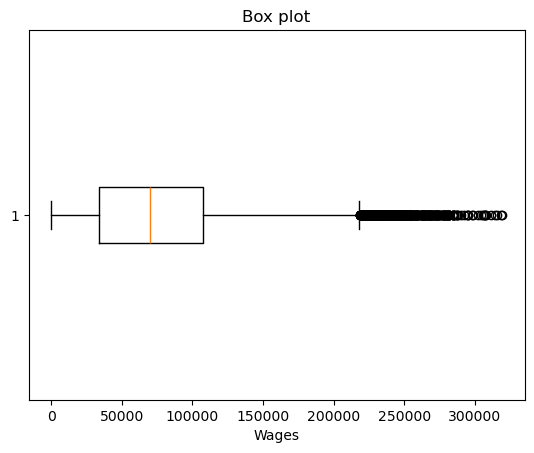

In [15]:
#read the prevailing wage data and plot the box plot
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Box plot')
plt.xlabel('Wages')
plt.show()

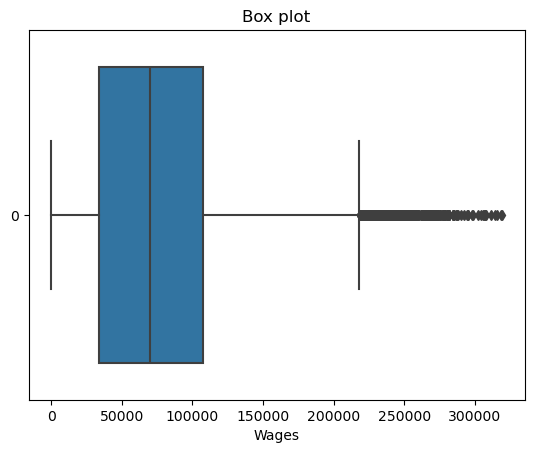

In [16]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Box plot')
plt.xlabel('Wages')
plt.show()

In [17]:
#plot the histogram and box plot side by side

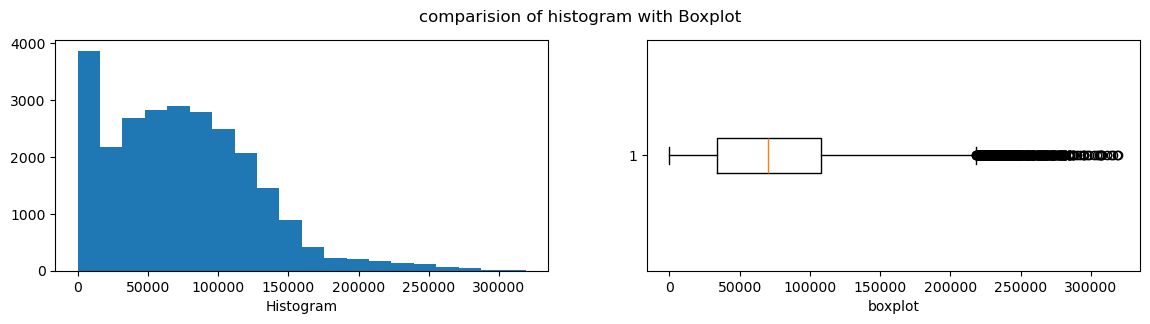

In [5]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

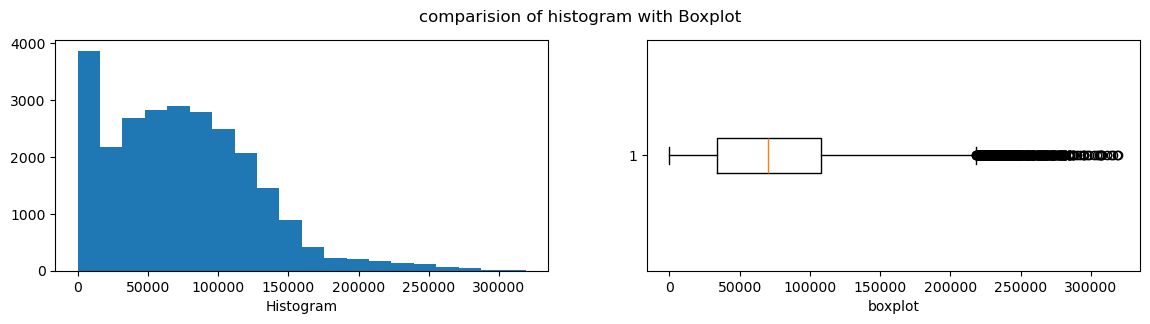

In [18]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

**finding the outliers**
- we already know that outliers available less than Q1-1.5*IQR and Q3+1.5*IQR
- Step-1:
    - Calculate Q1=25p
    - Calculate Q2=50p
    - Calculate Q3=75p
- Step-2:
    - Calculate IQR=Q3-Q1
- Step-3:
    - Calculate LB=Q1-1.5*IQR
    - Calculate UB=Q3+1.5*IQR
- Step-4:
    - Con1=wage_data<UB
    - Con2=wage_data>LB
    - Con3=Con1 or-and Con2
- Step-5: Data[con3]

In [19]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data < lb
con2=wage_data > ub
con3=con1|con2 #bitwise operators used to compare bits data 0 and 1 True and False
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [20]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [21]:
#non-outliers
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data > lb
con2=wage_data < ub
con3=con1&con2
non_outliers_data=wage_data[con3]
non_outliers_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

In [22]:
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframes
- visa_df: total data:25480
- non_outilers_df=after removing the outliers 25053
- first plot nonoutliers data prevailing wage histogram and boxplot

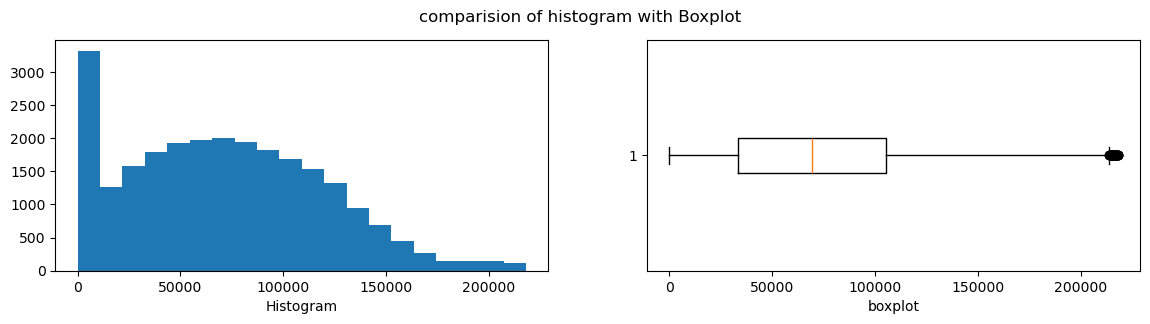

In [38]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

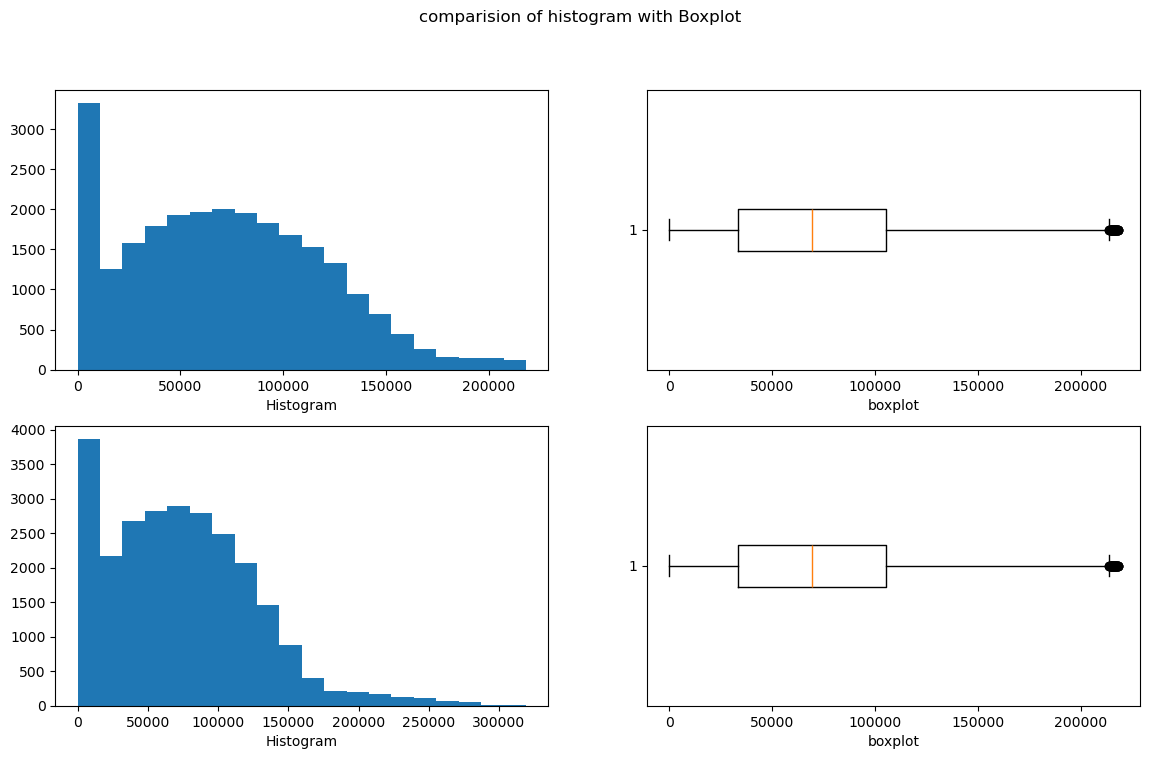

In [37]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
############## Non outliers #########################
plt.figure(figsize=(14,8))
plt.suptitle('comparision of histogram with Boxplot')
plt.subplot(2,2,1)
plt.hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2)
plt.boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
############# Entire data##########################
plt.subplot(2,2,3)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4)
plt.boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

In [25]:
# fill the outliers of wage_data with wage median 
# 427 outliers
# 427 should replace with median value
# again draw the plot

In [ ]:
#import the packages
#read the data 
#convert ino cat to numerical
#find the outliers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

In [28]:
wage_data=visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data < lb
con2=wage_data > ub
con3=con1|con2 #bitwise operators used to compare bits data 0 and 1 True and False
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [29]:
#non-outliers
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data > lb
con2=wage_data < ub
con3=con1&con2
non_outliers_data=wage_data[con3]
non_outliers_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

In [30]:
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


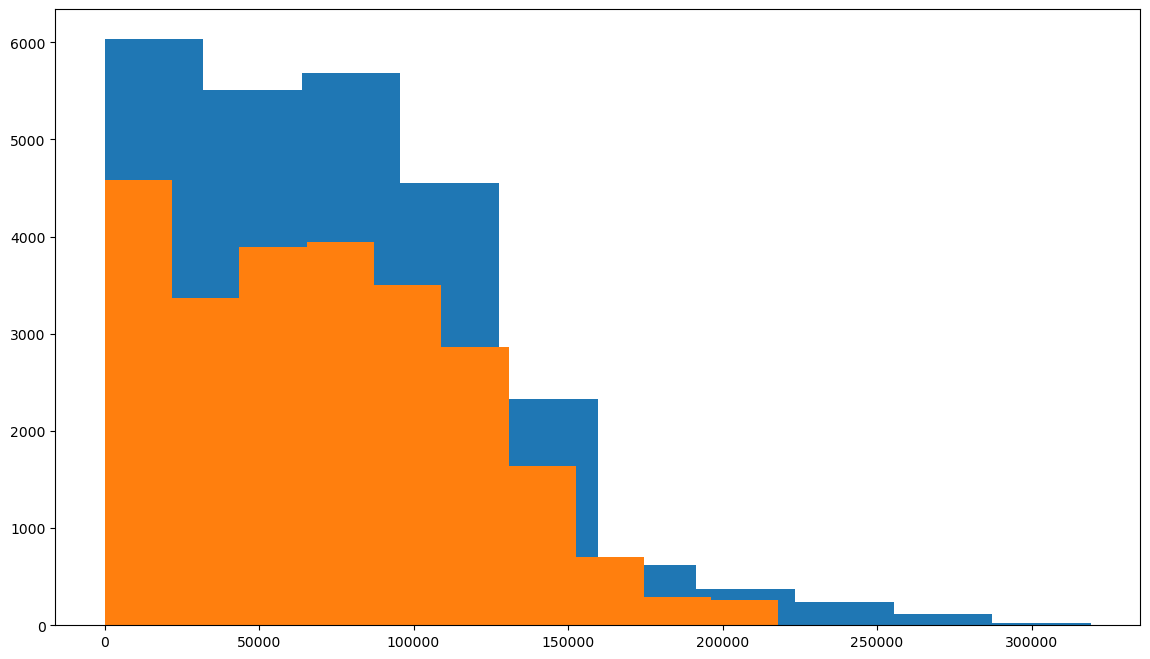

In [32]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
############## Non outliers #########################
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to deal with outliers**
- 1. We can drop the outliers
     - Dropping the outliers is an easy task,but not recommended
     - if u drop the outliers we are droping the rows
     - which means we are droping the other column values also
     - may be some important info we might loose from other column values
     - but in industry if outliers percentage is less than 2% of total data then we can drop
     - the number of outliers pwage is 427
     - the number of total observations aer 25480
     - the percentage is 1.67 which is less than 2%
- 2. Fill with median value
     - we already know that outliers doe not affect by median
     - so it is the best practice to fill the outliers with median
- 3. Capping or flooring
     - instead of dill with median
     - we can fill with certain values
     - the outliers which are Less than LB fill with LB values
     - the outliers which are greater than UB fill with UB values
- **Isolation forest**
  - is an ml model usedto find the outliers and anamolies.

**Fill with median value**

**np.where**
- In numpy we have a method called where
- it takes threee arguments
    - 1. Condition
    - 2. Value if condition is True
    - 3. Value if condition if False
- it is applicable for only for Binary means if and else

In [42]:
list1=[]
for value in wage_data:
    if value < lb or value > ub:
        median=wage_data.median()
        list1.append(median)
    else:
        list1.append(value)

In [47]:
dict1={'Sub':['DS','DE','CS'],
    'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [49]:
#Q: I want to replace marks with 1, which are greater than 100
l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [50]:
dict1={'Sub':['DS','DE','CS'],
    'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [56]:
#np.where(<condition>,<True>,<False>)
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [58]:
#implement for outliers
wage_data=visa_df['prevailing_wage']
con1=wage_data<lb
con2=wage_data>ub
con= con1|con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [59]:
visa_df['prevailing_wage_updated']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

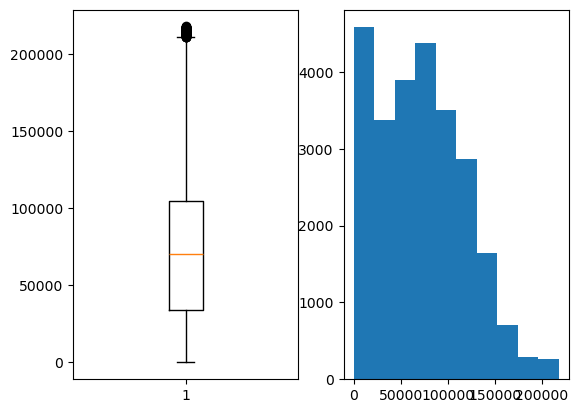

In [62]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_updated'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_updated'])